## Observations and Insights 

1. Merged dataset has 1893 rows with 8 columns with 249 unique mice. Mouse with ID 'g989' had duplicates, so we decided delete the data on that mouse and we end up having 248 mice and dataset with 1880 rows and 8 columns.

2. In our bar chart we can observe that mice on Capomulin and Ramicane drug regimens were mostly measured. Pie chart shows us that distribution of Female versus Male mice is almost same with female 49% and male 51% of all the mice.

3. From scatter plot that we plotted, we can observe that bigger mouse is the bigger tumor volume they have.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_mouse_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(combined_mouse_data.loc[combined_mouse_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique())

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_mouse_data[combined_mouse_data["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mouse_data = combined_mouse_data[combined_mouse_data["Mouse ID"] != "g989"]
unique_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mouse_data["Mouse ID"].nunique()

248

In [7]:
# Checking if duplicates are dropped
g989_mouse_data = unique_mouse_data[unique_mouse_data["Mouse ID"] == "g989"]
g989_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mouse_data = unique_mouse_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen')

mean = mouse_data.mean()['Tumor Volume (mm3)']
median = mouse_data.median()['Tumor Volume (mm3)']
var = mouse_data.var()['Tumor Volume (mm3)']
std = mouse_data.std()['Tumor Volume (mm3)']
sem = mouse_data.sem()['Tumor Volume (mm3)']


statistics_df = pd.DataFrame ({"Mean": mean, "Median": median, "Var": var, "STD": std, "SEM": sem})
statistics_df

,Mean,Median,Var,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_data.agg(["mean", "median", "var", "std", "sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Mice Count')

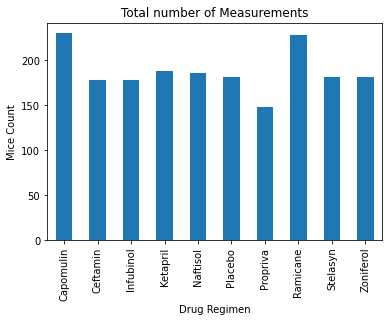

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_measurements = unique_mouse_data.groupby("Drug Regimen").count()["Mouse ID"]
drug_regimen_measurements.plot(kind = 'bar')
plt.title("Total number of Measurements")
plt.ylabel("Mice Count")

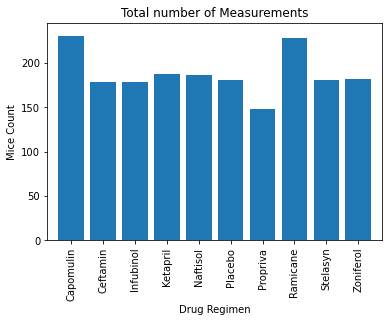

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
import numpy as np

drug_regimen = np.sort(unique_mouse_data["Drug Regimen"].unique())
x_axis = np.arange(len(drug_regimen_measurements))
plt.bar(x_axis, drug_regimen_measurements, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen, rotation = "vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_regimen_measurements)+15)
plt.title("Total number of Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.show()

(-1.106700641755685,
 1.1034697461867102,
 -1.1091177556002698,
 1.2128639238082213)

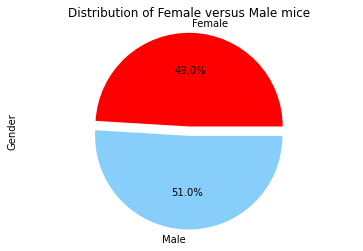

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_groups = unique_mouse_data.groupby('Sex').count()["Mouse ID"]
explode =(0.1,0)
colors = ["red", "lightskyblue"]
sex_groups.plot(kind = 'pie', explode=explode, colors = colors, autopct="%1.1f%%", title=("Distribution of Female versus Male mice"))
plt.ylabel("Gender")
plt.axis("equal")

(-1.106700641755685,
 1.1034697461867102,
 -1.1091177556002698,
 1.2128639238082213)

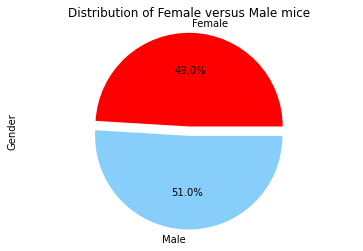

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = np.sort(unique_mouse_data['Sex'].unique())
colors = ["red", "lightskyblue"]
explode = (0.1, 0)
plt.pie(sex_groups, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title ("Distribution of Female versus Male mice")
plt.ylabel("Gender")
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens = unique_mouse_data[unique_mouse_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = four_regimens.groupby('Mouse ID').max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_df = pd.merge(four_regimens, last_timepoint, on=("Mouse ID", "Timepoint"))
last_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = last_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
quartiles = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in range(len(drug_regimen)):
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    data = last_df.loc[last_df['Drug Regimen'] == drug_regimen[drug], 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(data)

    # Determine outliers using upper and lower bounds
    quartiles.append(tumor_vol_data[drug].quantile([.25,.5,.75]))
    
    upperq = quartiles[drug][.75]
    lowerq = quartiles[drug][.25]
    iqr = upperq-lowerq
    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)
    
    print(drug_regimen[drug])
    print(f"The upper quartile on {drug_regimen[drug]} drug is {upperq}.")
    print(f"The lower quartile on {drug_regimen[drug]} drug is {lowerq}.")
    print(f"The IQR  on {drug_regimen[drug]} drug is {iqr}.")
    print(f'Upper Bound for {drug_regimen[drug]} are {upper_bound}')
    print(f'Lower Bound for {drug_regimen[drug]} are {lower_bound}')
    print(' ')
    

Ramicane
The upper quartile on Ramicane drug is 40.65900627.
The lower quartile on Ramicane drug is 31.56046955.
The IQR  on Ramicane drug is 9.098536719999998.
Upper Bound for Ramicane are 54.30681135
Lower Bound for Ramicane are 17.912664470000003
 
Capomulin
The upper quartile on Capomulin drug is 40.1592203.
The lower quartile on Capomulin drug is 32.37735684.
The IQR  on Capomulin drug is 7.781863460000004.
Upper Bound for Capomulin are 51.83201549
Lower Bound for Capomulin are 20.70456164999999
 
Infubinol
The upper quartile on Infubinol drug is 65.52574285.
The lower quartile on Infubinol drug is 54.04860769.
The IQR  on Infubinol drug is 11.477135160000003.
Upper Bound for Infubinol are 82.74144559000001
Lower Bound for Infubinol are 36.83290494999999
 
Ceftamin
The upper quartile on Ceftamin drug is 64.29983003.
The lower quartile on Ceftamin drug is 48.72207785.
The IQR  on Ceftamin drug is 15.577752179999997.
Upper Bound for Ceftamin are 87.66645829999999
Lower Bound for Cef

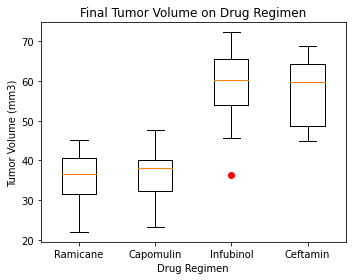

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.figure(figsize=(5,4))
plt.boxplot(tumor_vol_data, labels=drug_regimen, sym='ro')

plt.title("Final Tumor Volume on Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")

plt.tight_layout()
plt.show()

## Line and Scatter Plots

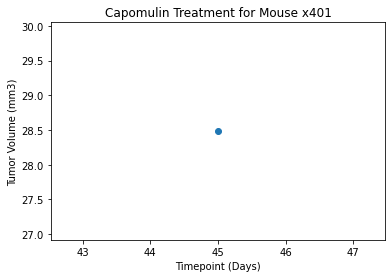

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = last_df[last_df["Drug Regimen"] == "Capomulin"]
capomulin_df

mouse = last_df[last_df["Mouse ID"] == "x401"]
mouse

x = mouse["Timepoint"]
y = mouse["Tumor Volume (mm3)"]

plt.plot(x, y, marker='o')
plt.title("Capomulin Treatment for Mouse x401")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")


plt.show()

Text(0.5, 0, 'Weight (g)')

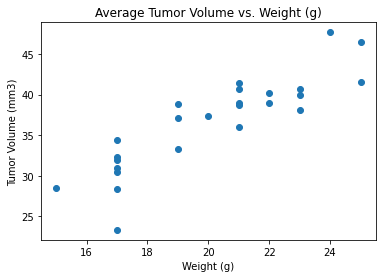

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_df = capomulin_df.groupby(["Mouse ID"]).mean()
weight = average_df["Weight (g)"]
tumor = average_df["Tumor Volume (mm3)"]

plt.scatter(weight, tumor)
plt.title("Average Tumor Volume vs. Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

## Correlation and Regression

The correlation coefficient between mouse Weight and Average Tumor Volume (0.8767060403658116, 9.08442908867345e-09).


Text(0, 0.5, 'Tumor Volume (mm3)')

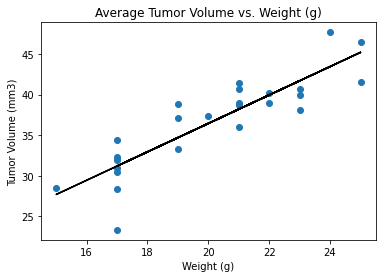

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, tumor)
print(f"The correlation coefficient between mouse Weight and Average Tumor Volume {correlation}.")

cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(weight, tumor)
cap_fit = cap_slope * weight + cap_int
plt.plot(weight, cap_fit, "-", color="black")
plt.scatter(weight, tumor)
plt.title("Average Tumor Volume vs. Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")